<a href="https://colab.research.google.com/github/Vasundhara-Boomi/Prediction-of-Neurodegenerative-disease-by-Hand-Drawing/blob/main/Prediction_By_Hand_Drawing_DL_ML_Process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'parkinsons-drawings:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F178338%2F401677%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240501%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240501T083452Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D49a001df583cc397e372b01e50467fa5e3240aba35b111bce587e4a151ca4c2b015f6da7acbbf455c604f5be9f7b047f42f5a77b2e73ddc35538a88d28647624085c301383f83511fc24ad2acad8cc998634042d513fa62f66be889e7dd23bc485293c63fa6233f9cef7b2961b35f41e0a693d295efbc510befcdadc7fc2b60a35bb61891c1a7f93c0b116e0e13f423fa3e4b2c2df93922c8f6d8a2211010239be8fa8cd21f51f4706f93d216a68fdd5028cc9af7ef2dee5edc04a64f354c8929b59ff133d021baa2a88615219cd5ebbccc9d0949126238b6b2d27d2fba9c66a705b2e06e3b1cd95eeee0a9df092d6ffa563dd980e9fd178121a8de33ac21730'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 43444848 bytes downloaded
Downloaded and uncompressed: parkinsons-drawings
Data source import complete.


# HISTORY

#### Content
* Images of healthy and patients with Parkinsons drawing spirals and waves. The images are further divided into training and testing groups for comparing (or reproducing) the results of the original publication.

#### Acknowledgements
* The data came from the paper: Zham P, Kumar DK, Dabnichki P, Poosapadi Arjunan S and Raghav S (2017) Distinguishing Different Stages of Parkinson’s Disease Using Composite Index of Speed and Pen-Pressure of Sketching a Spiral. Front. Neurol. 8:435. doi: 10.3389/fneur.2017.00435

https://www.frontiersin.org/articles/10.3389/fneur.2017.00435/full

# PACKAGES AND LIBRARIES

In [3]:
! pip install tensorflow
! pip install keras
! pip install catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 7.6 MB/s eta 0:00:00


In [6]:
#GENERAL
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#PATH PROCESS
import os
import os.path
from pathlib import Path
import glob
#IMAGE PROCESS
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
#SCALER & TRANSFORMATION
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.preprocessing import LabelEncoder
#ACCURACY CONTROL
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
#OPTIMIZER
from keras.optimizers import RMSprop,Adam,Optimizer,Optimizer
#MODEL LAYERS
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN, LSTM, GlobalAveragePooling2D, SeparableConv2D
from keras import models
from keras import layers
import tensorflow as tf
from keras.applications import VGG16,VGG19,inception_v3
from keras import backend as K
from keras.utils import plot_model
#SKLEARN CLASSIFIER
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

#IGNORING WARNINGS
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning)
filterwarnings("ignore", category=UserWarning)

# PATH & LABELS

#### TRAIN-TEST PATH

In [7]:
Spiral_Train_Path = Path("../input/parkinsons-drawings/spiral/training")
Spiral_Test_Path = Path("../input/parkinsons-drawings/spiral/testing")

In [8]:
Spiral_Train_PNG_Path = list(Spiral_Train_Path.glob(r"*/*.png"))
Spiral_Test_PNG_Path = list(Spiral_Test_Path.glob(r"*/*.png"))

#### LABELS

In [9]:
Spiral_Train_PNG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Spiral_Train_PNG_Path))
Spiral_Test_PNG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Spiral_Test_PNG_Path))

# TRANSFORMATION TO SERIES STRUCTURE

#### SPIRAL

In [10]:
Spiral_Train_PNG_Path_Series = pd.Series(Spiral_Train_PNG_Path,name="PNG").astype(str)
Spiral_Train_PNG_Labels_Series = pd.Series(Spiral_Train_PNG_Labels,name="CATEGORY")

In [11]:
Spiral_Test_PNG_Path_Series = pd.Series(Spiral_Test_PNG_Path,name="PNG").astype(str)
Spiral_Test_PNG_Labels_Series = pd.Series(Spiral_Test_PNG_Labels,name="CATEGORY")

# TRANSFORMATION TO DATAFRAME STRUCTURE

#### SPIRAL

In [12]:
Main_Spiral_Train_Data = pd.concat([Spiral_Train_PNG_Path_Series,Spiral_Train_PNG_Labels_Series],axis=1)

In [13]:
print(Main_Spiral_Train_Data.head(-1))

                                                  PNG   CATEGORY
0   ../input/parkinsons-drawings/spiral/training/h...    healthy
1   ../input/parkinsons-drawings/spiral/training/h...    healthy
2   ../input/parkinsons-drawings/spiral/training/h...    healthy
3   ../input/parkinsons-drawings/spiral/training/h...    healthy
4   ../input/parkinsons-drawings/spiral/training/h...    healthy
..                                                ...        ...
66  ../input/parkinsons-drawings/spiral/training/p...  parkinson
67  ../input/parkinsons-drawings/spiral/training/p...  parkinson
68  ../input/parkinsons-drawings/spiral/training/p...  parkinson
69  ../input/parkinsons-drawings/spiral/training/p...  parkinson
70  ../input/parkinsons-drawings/spiral/training/p...  parkinson

[71 rows x 2 columns]


In [14]:
Main_Spiral_Test_Data = pd.concat([Spiral_Test_PNG_Path_Series,Spiral_Test_PNG_Labels_Series],axis=1)

In [15]:
print(Main_Spiral_Test_Data.head(-1))

                                                  PNG   CATEGORY
0   ../input/parkinsons-drawings/spiral/testing/he...    healthy
1   ../input/parkinsons-drawings/spiral/testing/he...    healthy
2   ../input/parkinsons-drawings/spiral/testing/he...    healthy
3   ../input/parkinsons-drawings/spiral/testing/he...    healthy
4   ../input/parkinsons-drawings/spiral/testing/he...    healthy
5   ../input/parkinsons-drawings/spiral/testing/he...    healthy
6   ../input/parkinsons-drawings/spiral/testing/he...    healthy
7   ../input/parkinsons-drawings/spiral/testing/he...    healthy
8   ../input/parkinsons-drawings/spiral/testing/he...    healthy
9   ../input/parkinsons-drawings/spiral/testing/he...    healthy
10  ../input/parkinsons-drawings/spiral/testing/he...    healthy
11  ../input/parkinsons-drawings/spiral/testing/he...    healthy
12  ../input/parkinsons-drawings/spiral/testing/he...    healthy
13  ../input/parkinsons-drawings/spiral/testing/he...    healthy
14  ../input/parkinsons-d

# SHUFFLING

In [16]:
Main_Spiral_Train_Data = Main_Spiral_Train_Data.sample(frac=1).reset_index(drop=True)
Main_Spiral_Test_Data = Main_Spiral_Test_Data.sample(frac=1).reset_index(drop=True)

In [17]:
print(Main_Spiral_Train_Data.head(-1))
print("---"*20)
print(Main_Spiral_Test_Data.head(-1))

                                                  PNG   CATEGORY
0   ../input/parkinsons-drawings/spiral/training/p...  parkinson
1   ../input/parkinsons-drawings/spiral/training/p...  parkinson
2   ../input/parkinsons-drawings/spiral/training/p...  parkinson
3   ../input/parkinsons-drawings/spiral/training/p...  parkinson
4   ../input/parkinsons-drawings/spiral/training/h...    healthy
..                                                ...        ...
66  ../input/parkinsons-drawings/spiral/training/p...  parkinson
67  ../input/parkinsons-drawings/spiral/training/h...    healthy
68  ../input/parkinsons-drawings/spiral/training/h...    healthy
69  ../input/parkinsons-drawings/spiral/training/p...  parkinson
70  ../input/parkinsons-drawings/spiral/training/h...    healthy

[71 rows x 2 columns]
------------------------------------------------------------
                                                  PNG   CATEGORY
0   ../input/parkinsons-drawings/spiral/testing/pa...  parkinson
1   ..

# VISUALIZATION

In [18]:
plt.style.use("dark_background")

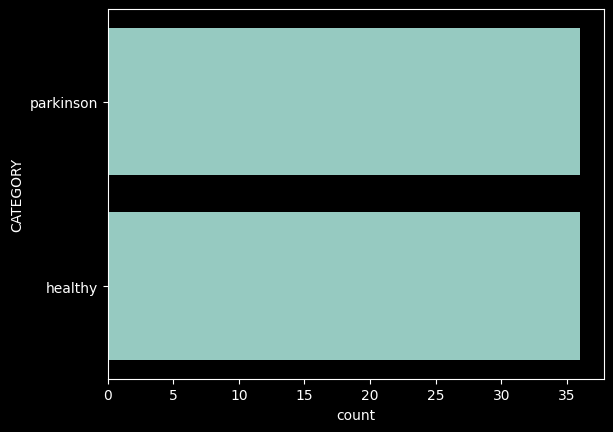

In [19]:
sns.countplot(Main_Spiral_Train_Data["CATEGORY"])
plt.show()

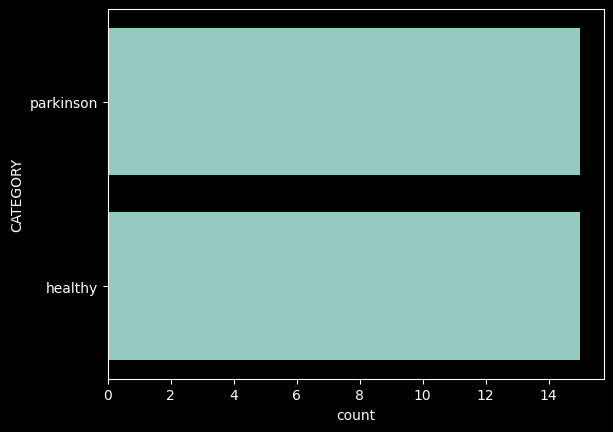

In [20]:
sns.countplot(Main_Spiral_Test_Data["CATEGORY"])
plt.show()

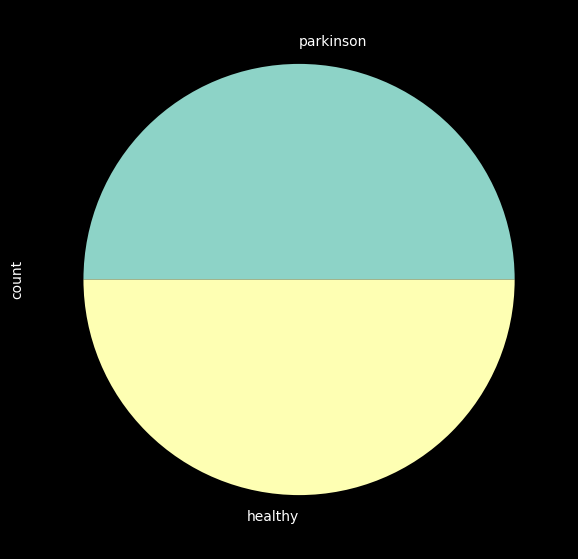

In [21]:
Main_Spiral_Train_Data['CATEGORY'].value_counts().plot.pie(figsize=(7,7))
plt.show()

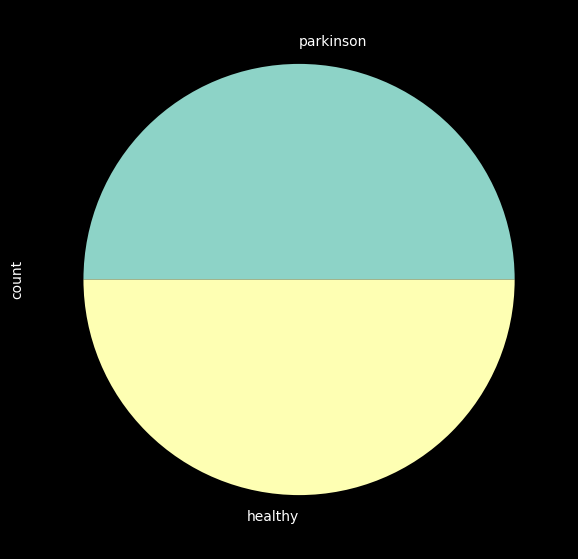

In [22]:
Main_Spiral_Test_Data['CATEGORY'].value_counts().plot.pie(figsize=(7,7))
plt.show()

Text(0.5, 1.0, 'parkinson')

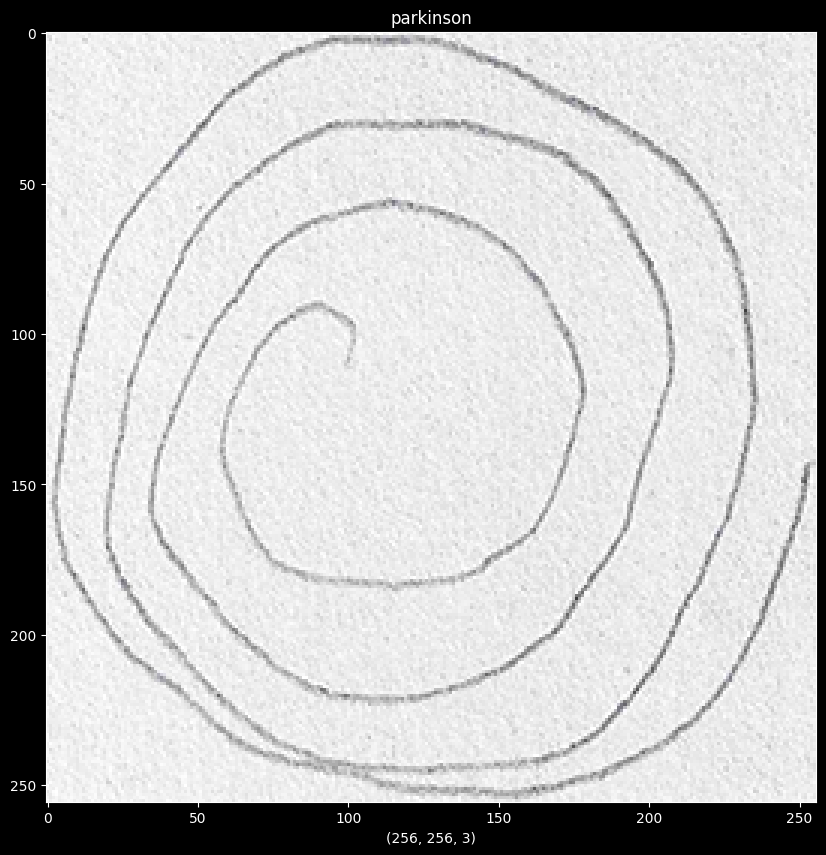

In [23]:
figure = plt.figure(figsize=(10,10))
x = plt.imread(Main_Spiral_Train_Data["PNG"][0])
plt.imshow(x)
plt.xlabel(x.shape)
plt.title(Main_Spiral_Train_Data["CATEGORY"][0])

Text(0.5, 1.0, 'parkinson')

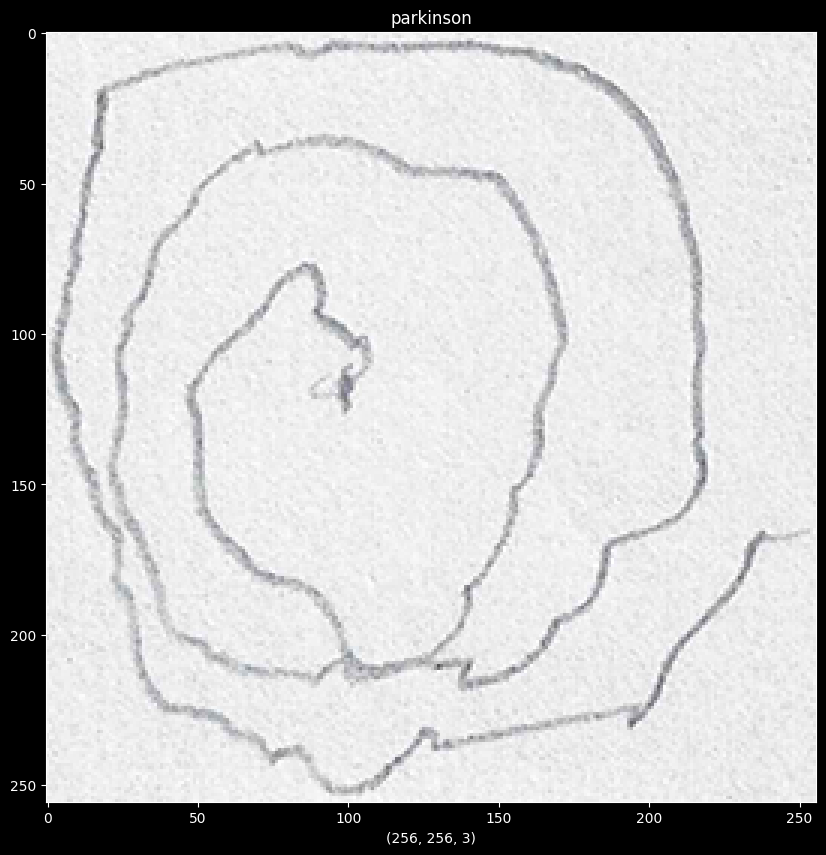

In [24]:
figure = plt.figure(figsize=(10,10))
x = plt.imread(Main_Spiral_Test_Data["PNG"][0])
plt.imshow(x)
plt.xlabel(x.shape)
plt.title(Main_Spiral_Test_Data["CATEGORY"][0])

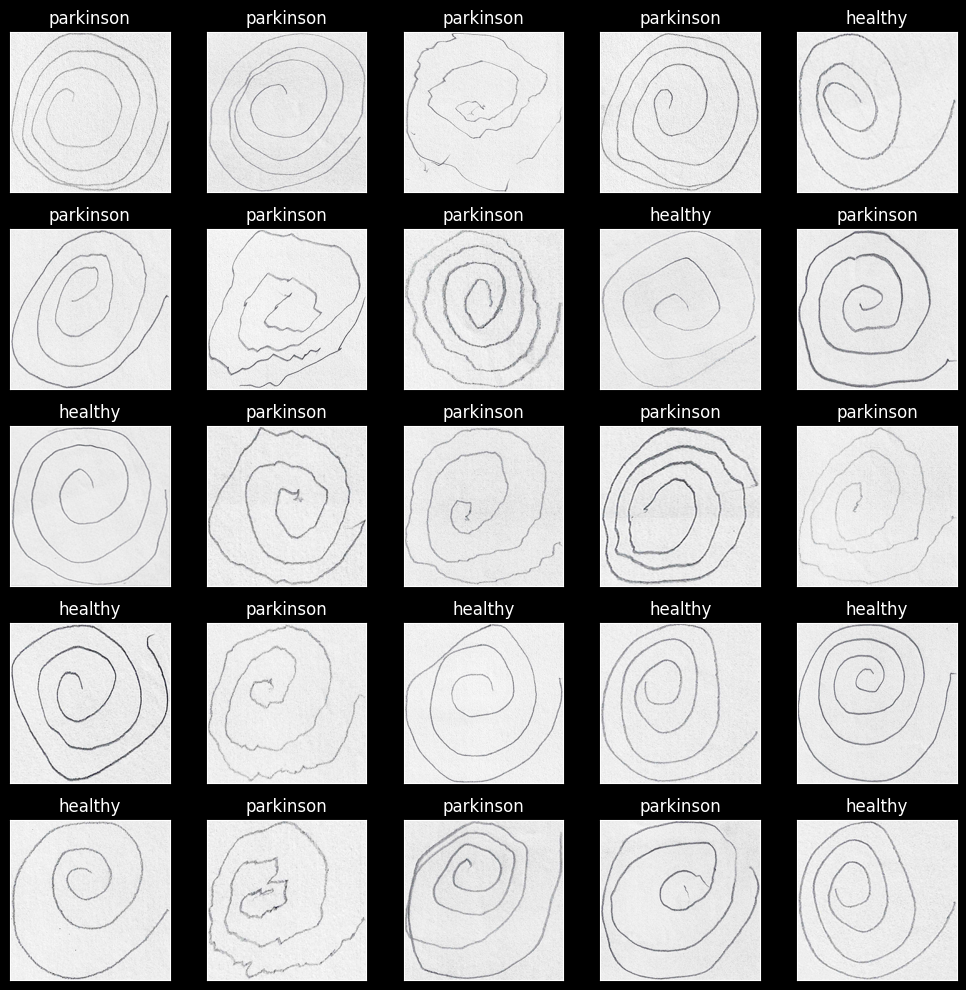

In [25]:
fig, axes = plt.subplots(nrows=5,
                        ncols=5,
                        figsize=(10,10),
                        subplot_kw={"xticks":[],"yticks":[]})

for i,ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Main_Spiral_Train_Data["PNG"][i]))
    ax.set_title(Main_Spiral_Train_Data["CATEGORY"][i])
plt.tight_layout()
plt.show()

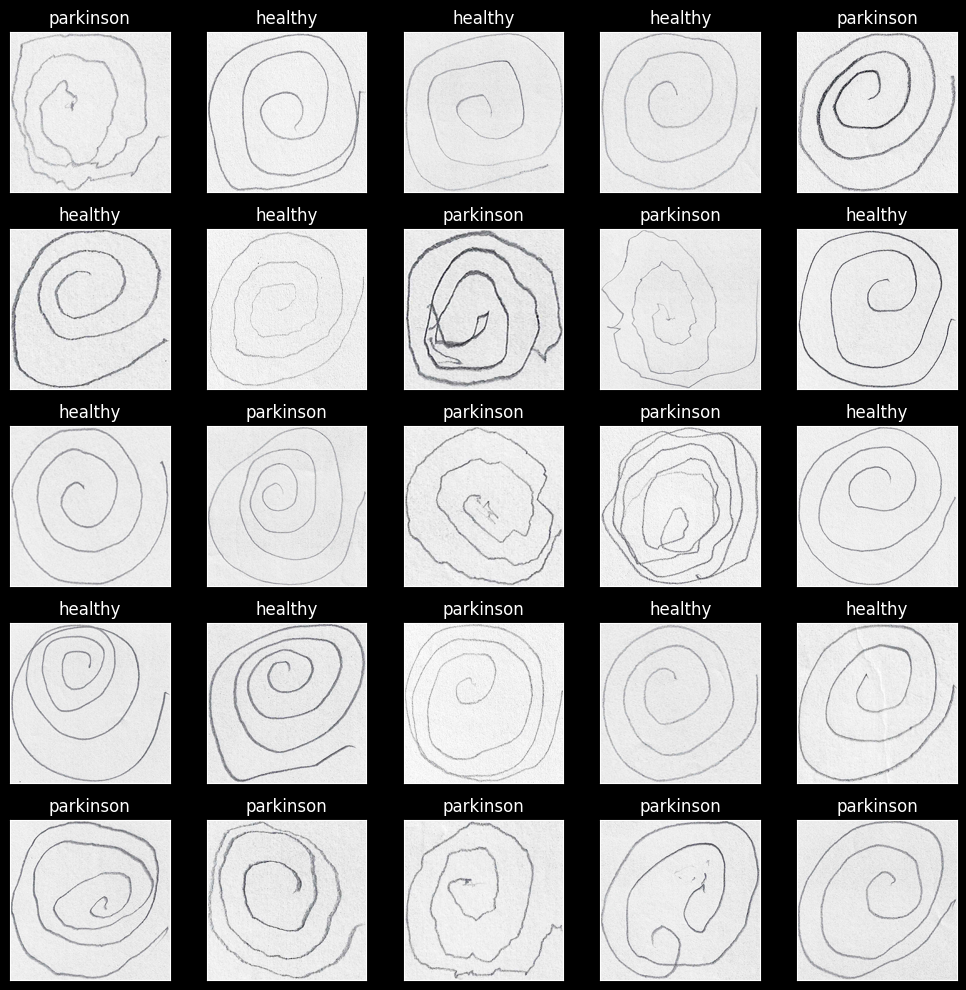

In [26]:
fig, axes = plt.subplots(nrows=5,
                        ncols=5,
                        figsize=(10,10),
                        subplot_kw={"xticks":[],"yticks":[]})

for i,ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Main_Spiral_Test_Data["PNG"][i]))
    ax.set_title(Main_Spiral_Test_Data["CATEGORY"][i])
plt.tight_layout()
plt.show()

# CLASSIFIERS

#### TRANSFORMATION

In [27]:
Spiral_New_JPG_Path = []
for i in range(0,72):
    x = cv2.imread(Main_Spiral_Train_Data["PNG"][i])
    x = np.array(x).astype("float32")
    x = x.mean()
    Spiral_New_JPG_Path.append(x)

In [28]:
Spiral_New_JPG_Path_Series = pd.Series(Spiral_New_JPG_Path,name="PNG")

In [29]:
print(Spiral_New_JPG_Path_Series)

0     231.410538
1     227.889709
2     235.574646
3     230.673401
4     232.266479
         ...    
67    227.295761
68    232.818207
69    232.981796
70    231.418961
71    231.016342
Name: PNG, Length: 72, dtype: float32


In [30]:
encode = LabelEncoder()

In [31]:
Spiral_New_JPG_Labels = encode.fit_transform(Main_Spiral_Train_Data["CATEGORY"])

In [32]:
Spiral_New_JPG_Labels_Series = pd.Series(Spiral_New_JPG_Labels,name="CATEGORY")

In [33]:
print(Spiral_New_JPG_Labels_Series)

0     1
1     1
2     1
3     1
4     0
     ..
67    0
68    0
69    1
70    0
71    0
Name: CATEGORY, Length: 72, dtype: int64


In [34]:
Main_Spiral_New_Data = pd.concat([Spiral_New_JPG_Path_Series,Spiral_New_JPG_Labels_Series],axis=1)

In [35]:
print(Main_Spiral_New_Data)

           PNG  CATEGORY
0   231.410538         1
1   227.889709         1
2   235.574646         1
3   230.673401         1
4   232.266479         0
..         ...       ...
67  227.295761         0
68  232.818207         0
69  232.981796         1
70  231.418961         0
71  231.016342         0

[72 rows x 2 columns]


#### TRAIN & TEST

In [36]:
x = Main_Spiral_New_Data[["PNG"]]
y = Main_Spiral_New_Data["CATEGORY"]

In [37]:
print(x.shape)

(72, 1)


In [38]:
print(y.shape)

(72,)


In [39]:
xTrain,xTest,yTrain,yTest = train_test_split(x,y,test_size=0.1,random_state=42)

In [40]:
print(xTrain.shape)
print(xTest.shape)
print(yTrain.shape)
print(yTest.shape)

(64, 1)
(8, 1)
(64,)
(8,)


#### MODELS

In [41]:
lj = LogisticRegression(solver="liblinear").fit(xTrain,yTrain)
gnb = GaussianNB().fit(xTrain,yTrain)
knnc = KNeighborsClassifier().fit(xTrain,yTrain)
cartc = DecisionTreeClassifier(random_state=42).fit(xTrain,yTrain)
rfc = RandomForestClassifier(random_state=42,verbose=False).fit(xTrain,yTrain)
gbmc = GradientBoostingClassifier(verbose=False).fit(xTrain,yTrain)
xgbc = XGBClassifier().fit(xTrain,yTrain)
lgbmc = LGBMClassifier().fit(xTrain,yTrain)
catbc = CatBoostClassifier(verbose=False).fit(xTrain,yTrain)

[LightGBM] [Info] Number of positive: 33, number of negative: 31
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000151 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 23
[LightGBM] [Info] Number of data points in the train set: 64, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.515625 -> initscore=0.062520
[LightGBM] [Info] Start training from score 0.062520
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

In [42]:
modelsc = [lj,gnb,knnc,cartc,rfc,gbmc,xgbc,lgbmc,catbc]

In [43]:
for model in modelsc:
    name = model.__class__.__name__
    predict = model.predict(xTest)
    R2CV = cross_val_score(model,xTest,yTest,verbose=False).mean()
    error = -cross_val_score(model,xTest,yTest,scoring="neg_mean_squared_error",verbose=False).mean()
    print(name + ": ")
    print("-" * 10)
    print("ACC-->",accuracy_score(yTest,predict))
    print("R2CV-->",R2CV*100)
    print("MEAN SQUARED ERROR-->",np.sqrt(error))
    print("-" * 30)

LogisticRegression: 
----------
ACC--> 0.375
R2CV--> 70.0
MEAN SQUARED ERROR--> 0.5477225575051661
------------------------------
GaussianNB: 
----------
ACC--> 0.5
R2CV--> 60.0
MEAN SQUARED ERROR--> 0.6324555320336759
------------------------------
KNeighborsClassifier: 
----------
ACC--> 0.375
R2CV--> 50.0
MEAN SQUARED ERROR--> 0.7071067811865476
------------------------------
DecisionTreeClassifier: 
----------
ACC--> 0.5
R2CV--> 70.0
MEAN SQUARED ERROR--> 0.5477225575051661
------------------------------
RandomForestClassifier: 
----------
ACC--> 0.5
R2CV--> 70.0
MEAN SQUARED ERROR--> 0.5477225575051661
------------------------------
GradientBoostingClassifier: 
----------
ACC--> 0.5
R2CV--> 70.0
MEAN SQUARED ERROR--> 0.5477225575051661
------------------------------
XGBClassifier: 
----------
ACC--> 0.25
R2CV--> 70.0
MEAN SQUARED ERROR--> 0.5477225575051661
------------------------------
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration

In [45]:
lm = LinearRegression().fit(xTrain,yTrain)
pls = PLSRegression(n_components=1).fit(xTrain, yTrain)
ridge = Ridge().fit(xTrain,yTrain)
lasso = Lasso().fit(xTrain,yTrain)
elasticnet = ElasticNet().fit(xTrain,yTrain)
knnr = KNeighborsRegressor().fit(xTrain,yTrain)
cartr = DecisionTreeRegressor(random_state=42).fit(xTrain,yTrain)
baggr = BaggingRegressor(random_state=42,bootstrap_features=True,verbose=False).fit(xTrain,yTrain)
rfr = RandomForestRegressor(random_state=42,verbose=False).fit(xTrain,yTrain)
gbmr = GradientBoostingRegressor(verbose=False).fit(xTrain,yTrain)
xgbr = XGBRegressor().fit(xTrain,yTrain)
lgbmr = LGBMRegressor().fit(xTrain,yTrain)
catbr = CatBoostRegressor(verbose=False).fit(xTrain,yTrain)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000052 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 23
[LightGBM] [Info] Number of data points in the train set: 64, number of used features: 1
[LightGBM] [Info] Start training from score 0.515625
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [46]:
models = [lm,pls,ridge,lasso,elasticnet,knnr,
         cartr,baggr,rfr,gbmr,xgbr,lgbmr,catbr]

In [47]:
for model in models:
    name = model.__class__.__name__
    R2CV = cross_val_score(model,xTest,yTest,scoring="r2").mean()
    error = -cross_val_score(model,xTest,yTest,scoring="neg_mean_squared_error").mean()
    print(name + ": ")
    print("-" * 10)
    print(R2CV)
    print(np.sqrt(error))
    print("-" * 30)

LinearRegression: 
----------
nan
0.488038032007775
------------------------------
PLSRegression: 
----------
nan
0.48803833432738464
------------------------------
Ridge: 
----------
nan
0.48677028623335516
------------------------------
Lasso: 
----------
nan
0.5648618812779436
------------------------------
ElasticNet: 
----------
nan
0.5389351794561317
------------------------------
KNeighborsRegressor: 
----------
nan
0.5585696017507576
------------------------------
DecisionTreeRegressor: 
----------
nan
0.6324555320336759
------------------------------
BaggingRegressor: 
----------
nan
0.5504543577809154
------------------------------
RandomForestRegressor: 
----------
nan
0.5830437376389528
------------------------------
GradientBoostingRegressor: 
----------
nan
0.6324506324188202
------------------------------
XGBRegressor: 
----------
nan
0.8361430294250703
------------------------------
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configu

# IMAGE GENERATOR PROCESS

#### APPLYING GENERATOR

In [48]:
Train_Generator = ImageDataGenerator(rescale=1./255,
                                    zoom_range=0.7,
                                    shear_range=0.7,
                                    rotation_range=50,
                                    horizontal_flip=True,
                                     brightness_range=[0.2,0.9],
                                     vertical_flip=True,
                                    validation_split=0.1)

In [49]:
Train_Spiral_Set = Train_Generator.flow_from_dataframe(dataframe=Main_Spiral_Train_Data,
                                                   x_col="PNG",
                                                   y_col="CATEGORY",
                                                   color_mode="grayscale",
                                                   class_mode="categorical",
                                                       subset="training")

Found 65 validated image filenames belonging to 2 classes.


In [50]:
Validation_Spiral_Set = Train_Generator.flow_from_dataframe(dataframe=Main_Spiral_Train_Data,
                                                   x_col="PNG",
                                                   y_col="CATEGORY",
                                                   color_mode="grayscale",
                                                   class_mode="categorical",
                                                       subset="validation")

Found 7 validated image filenames belonging to 2 classes.


In [51]:
Test_Spiral_Set = Train_Generator.flow_from_dataframe(dataframe=Main_Spiral_Test_Data,
                                                   x_col="PNG",
                                                   y_col="CATEGORY",
                                                   color_mode="grayscale",
                                                   class_mode="categorical")

Found 30 validated image filenames belonging to 2 classes.


In [52]:
print("TRAIN: ")
print(Train_Spiral_Set.class_indices)
print(Train_Spiral_Set.classes[0:5])
print(Train_Spiral_Set.image_shape)
print("---"*20)
print("VALIDATION: ")
print(Validation_Spiral_Set.class_indices)
print(Validation_Spiral_Set.classes[0:5])
print(Validation_Spiral_Set.image_shape)
print("---"*20)
print("TEST: ")
print(Test_Spiral_Set.class_indices)
print(Test_Spiral_Set.classes[0:5])
print(Test_Spiral_Set.image_shape)

TRAIN: 
{'healthy': 0, 'parkinson': 1}
[1, 0, 1, 0, 1]
(256, 256, 1)
------------------------------------------------------------
VALIDATION: 
{'healthy': 0, 'parkinson': 1}
[1, 1, 1, 1, 0]
(256, 256, 1)
------------------------------------------------------------
TEST: 
{'healthy': 0, 'parkinson': 1}
[1, 0, 0, 0, 1]
(256, 256, 1)


#### TRANSFORMATION

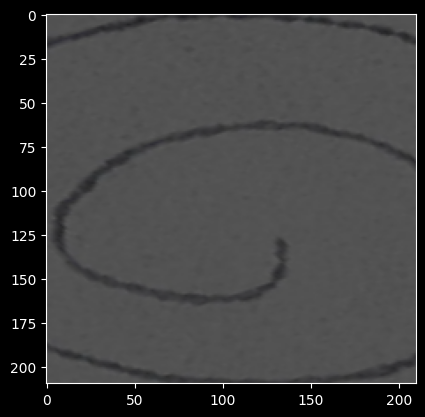

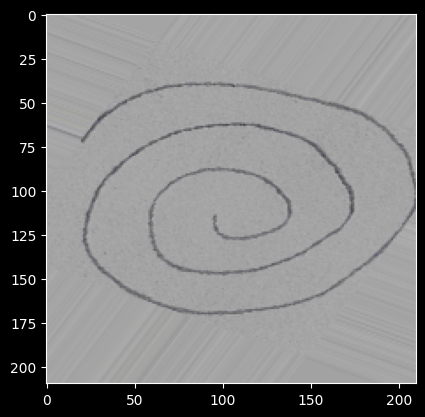

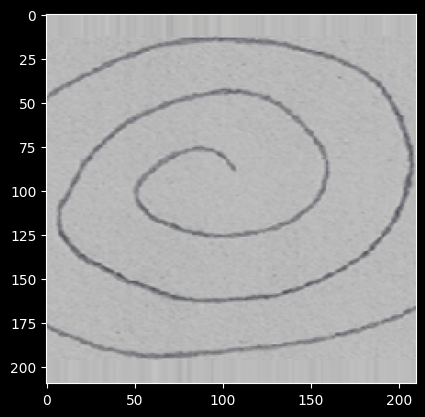

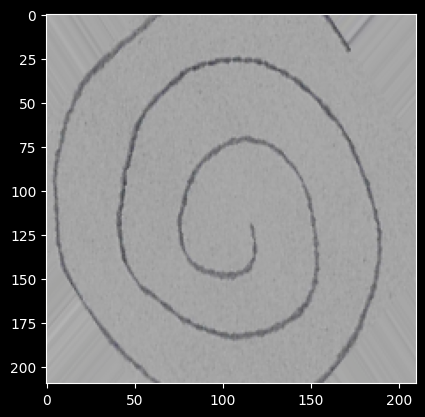

In [53]:
example_Image = Main_Spiral_Train_Data["PNG"][30]
Load_Image = image.load_img(example_Image,target_size=(210,210))
Array_Image = image.img_to_array(Load_Image)
Array_Image = Array_Image.reshape((1,) + Array_Image.shape)
i = 0
for batch in Train_Generator.flow(Array_Image,batch_size=5):
    plt.figure(i)
    Image = plt.imshow(image.img_to_array(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

# MODEL

#### CNN

In [54]:
Call_Back_Early = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                   patience=7,
                                                   mode="max")
Call_Back_Check = tf.keras.callbacks.ModelCheckpoint(monitor="val_accuracy",
                                                     save_best_only=True,
                                                     filepath="./my_model")

In [55]:
Model_One = Sequential()

#
Model_One.add(Conv2D(2,(15,15),activation="relu",
                 input_shape=(256,256,1)))
Model_One.add(MaxPooling2D((2,2)))
Model_One.add(Dropout(0.2))
#
Model_One.add(Conv2D(4,(10,10),activation="relu",
                 strides=(2,2)))
Model_One.add(MaxPooling2D((2,2)))
Model_One.add(Dropout(0.2))

#
Model_One.add(Flatten())
Model_One.add(Dropout(0.5))
Model_One.add(Dense(512,activation="relu"))
Model_One.add(Dense(2,activation="softmax"))

In [56]:
Model_One.compile(optimizer=RMSprop(lr=0.001),loss="categorical_crossentropy",metrics=["accuracy"])

In [59]:
CNN_Model_One = Model_One.fit(Train_Spiral_Set,
                      validation_data=Validation_Spiral_Set,
                            callbacks=[Call_Back_Check,Call_Back_Early],
                      epochs=50)

Epoch 1/50
3/3 [==============================] - 9s 3s/step - loss: 0.6899 - accuracy: 0.5385 - val_loss: 0.7940 - val_accuracy: 0.1429
Epoch 2/50
3/3 [==============================] - 8s 2s/step - loss: 0.6913 - accuracy: 0.5385 - val_loss: 0.7417 - val_accuracy: 0.1429
Epoch 3/50
3/3 [==============================] - 8s 2s/step - loss: 0.6912 - accuracy: 0.5385 - val_loss: 0.7211 - val_accuracy: 0.1429
Epoch 4/50
3/3 [==============================] - 8s 4s/step - loss: 0.6920 - accuracy: 0.5385 - val_loss: 0.7087 - val_accuracy: 0.1429
Epoch 5/50
3/3 [==============================] - 9s 2s/step - loss: 0.6917 - accuracy: 0.5385 - val_loss: 0.6961 - val_accuracy: 0.1429
Epoch 6/50
3/3 [==============================] - 9s 3s/step - loss: 0.6931 - accuracy: 0.5077 - val_loss: 0.6854 - val_accuracy: 0.8571
Epoch 7/50
3/3 [==============================] - 8s 4s/step - loss: 0.6962 - accuracy: 0.4615 - val_loss: 0.6760 - val_accuracy: 0.8571
Epoch 8/50
3/3 [=========================

In [60]:
Model_Results = Model_One.evaluate(Test_Spiral_Set)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.2f" % Model_Results[1])

1/1 [==============================] - 1s 817ms/step - loss: 0.6932 - accuracy: 0.5000
LOSS:  0.6932
ACCURACY:  0.50


#### ANN

In [61]:
Model_Two = tf.keras.models.Sequential([
  # inputs
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
  tf.keras.layers.Flatten(input_shape=(113,)),
  # hiddens layers
    tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  # output layer
  tf.keras.layers.Dense(2,activation="softmax")
])

In [62]:
lossfunc = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

In [63]:
Model_Two.compile(optimizer='adam', loss=lossfunc, metrics=['accuracy'])

In [65]:
ANN_Model = Model_Two.fit(Train_Spiral_Set,
                      validation_data=Validation_Spiral_Set,
                      epochs=5,batch_size=100)

Epoch 1/5
3/3 [==============================] - 1s 338ms/step - loss: 0.7180 - accuracy: 0.4615 - val_loss: 0.5800 - val_accuracy: 0.8571
Epoch 2/5
3/3 [==============================] - 1s 347ms/step - loss: 0.7301 - accuracy: 0.4615 - val_loss: 0.6199 - val_accuracy: 0.8571
Epoch 3/5
3/3 [==============================] - 1s 224ms/step - loss: 0.7022 - accuracy: 0.4615 - val_loss: 0.6580 - val_accuracy: 0.8571
Epoch 4/5
3/3 [==============================] - 1s 360ms/step - loss: 0.7010 - accuracy: 0.4615 - val_loss: 0.6600 - val_accuracy: 0.8571
Epoch 5/5
3/3 [==============================] - 1s 228ms/step - loss: 0.7009 - accuracy: 0.4462 - val_loss: 0.6679 - val_accuracy: 0.8571


In [66]:
Model_Results_Two = Model_Two.evaluate(Test_Spiral_Set)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.2f" % Model_Results[1])

1/1 [==============================] - 0s 299ms/step - loss: 0.6924 - accuracy: 0.5000
LOSS:  0.6932
ACCURACY:  0.50


# PREDICTION PROCESS

#### CNN

In [67]:
Prediction_One = Model_One.predict(Test_Spiral_Set)
Prediction_One = Prediction_One.argmax(axis=-1)

1/1 [==============================] - 1s 1s/step


In [74]:
Predict_Proba_One = Model_One.predict(Test_Spiral_Set)

# If you need class probabilities for binary classification
class_probabilities1 = Predict_Proba_One[:, 1]

1/1 [==============================] - 1s 1s/step


#### ANN

In [76]:
Prediction_Two = Model_Two.predict(Test_Spiral_Set)
Prediction_Two = Prediction_Two.argmax(axis=-1)

1/1 [==============================] - 0s 288ms/step


In [78]:
Predict_Proba_Two = Model_Two.predict(Test_Spiral_Set)
class_probabilities2 = Predict_Proba_Two[:, 1]


1/1 [==============================] - 0s 498ms/step


#### COMMUNITY

In [79]:
Main_Predict = 0.5 * (Predict_Proba_One + Predict_Proba_Two)

In [80]:
print(Main_Predict)

[[0.4960336  0.50396633]
 [0.48582405 0.514176  ]
 [0.4937014  0.50629866]
 [0.4864915  0.51350856]
 [0.49507475 0.50492525]
 [0.48980018 0.5101998 ]
 [0.4862841  0.51371586]
 [0.48825806 0.511742  ]
 [0.4914377  0.5085623 ]
 [0.48869485 0.5113052 ]
 [0.4875356  0.5124644 ]
 [0.4894539  0.5105462 ]
 [0.49179658 0.5082034 ]
 [0.49168158 0.5083184 ]
 [0.49366194 0.50633806]
 [0.49078855 0.5092115 ]
 [0.48973292 0.5102671 ]
 [0.48757815 0.51242185]
 [0.49661714 0.5033829 ]
 [0.48491782 0.5150822 ]
 [0.4902778  0.50972223]
 [0.4876839  0.5123162 ]
 [0.48564744 0.51435256]
 [0.49264586 0.50735414]
 [0.48784572 0.5121542 ]
 [0.48537892 0.514621  ]
 [0.49249774 0.50750226]
 [0.48548475 0.51451516]
 [0.4909684  0.50903153]
 [0.48532847 0.51467156]]


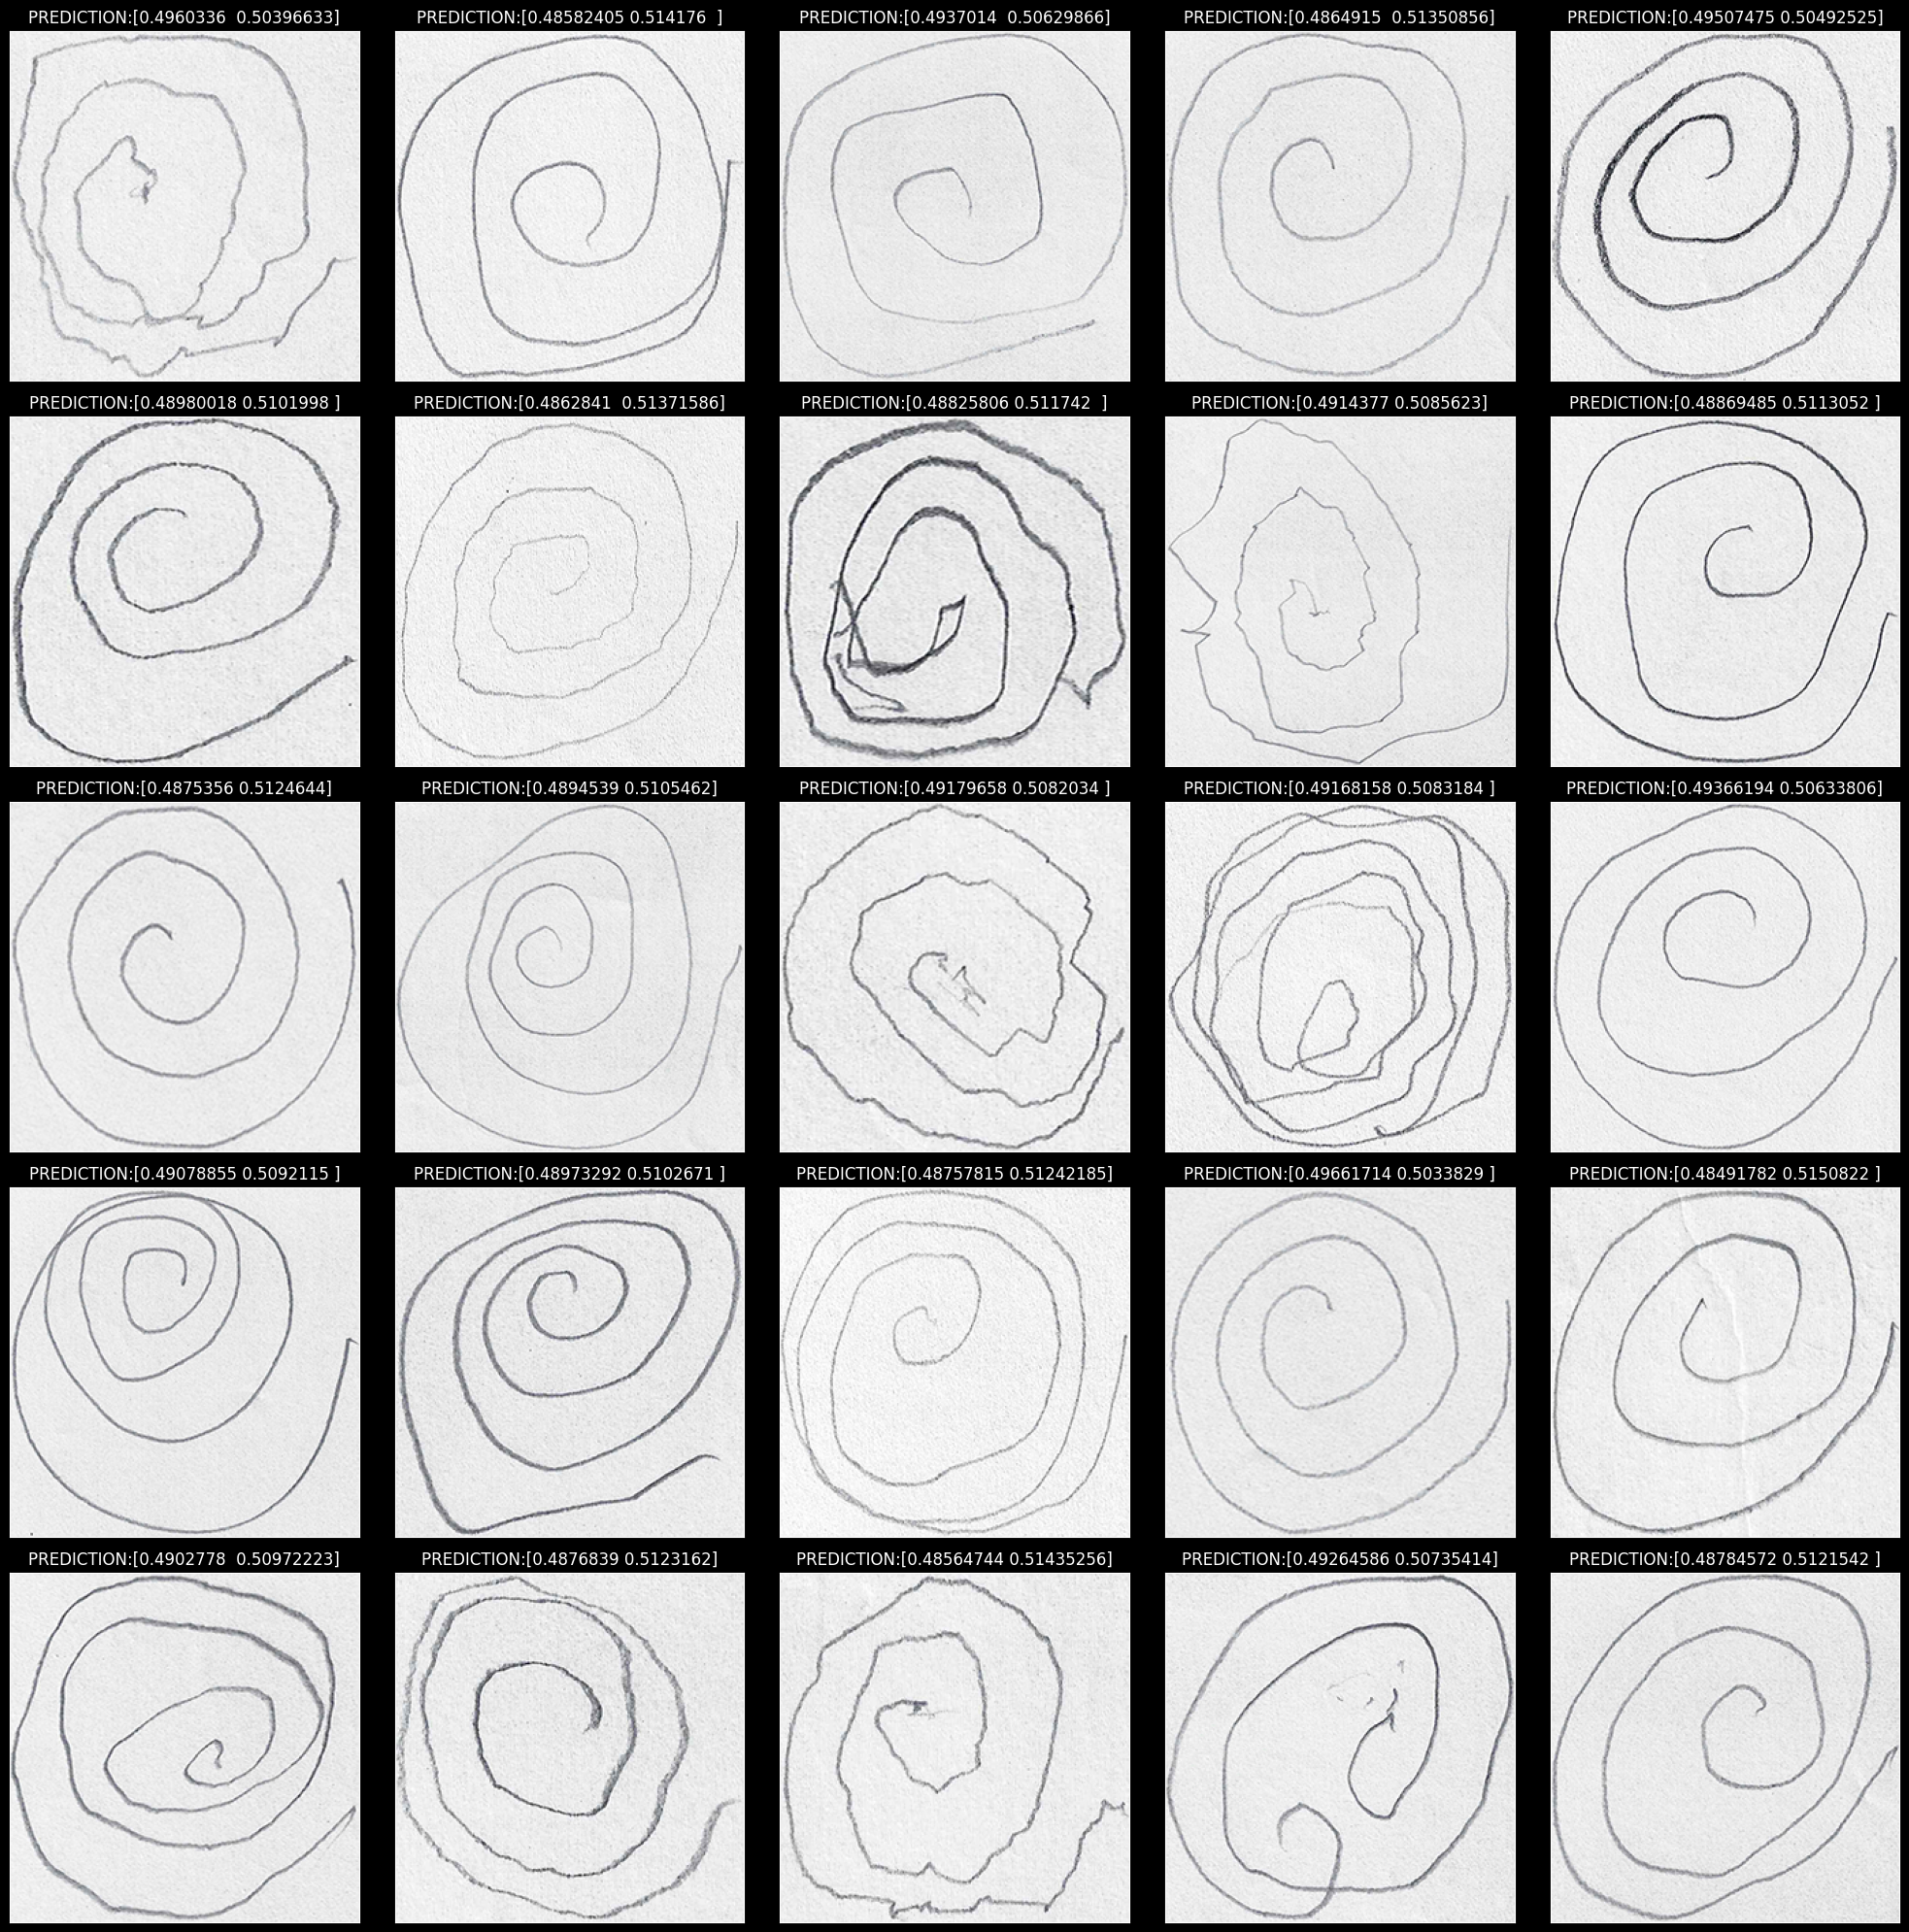

In [81]:
fig, axes = plt.subplots(nrows=5,
                         ncols=5,
                         figsize=(20, 20),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Main_Spiral_Test_Data["PNG"].iloc[i]))
    ax.set_title(f"PREDICTION:{Main_Predict[i]}")
plt.tight_layout()
plt.show()